In [3]:
import numpy as np
import scipy.stats as ss

import matplotlib.pyplot as plt

**Expectation (E[Y])** is a quantity that measures the central tendancy of a random variables (RV). When viewing a RV as an outcome a random experiment, `E` is the quantity that the outcomes will be centered around.

For example, if `Y` is a RV that represents the outcome of a fair coin flip, where "Heads" is equal to 1 and "Tails" equal to 0, then this RV may be modeled by the **Bernoilli** distribution with probability `p` = 0.5. We know that the expectation of a Bernoulli distribution is p, or 0.5. In the **frequentist** conception of probability, we can approximate `E` by the ratio of heads to the total number of flips, which is the **sample mean**. In this sense, we approach the theoretical expectation as the total number of flips increases.

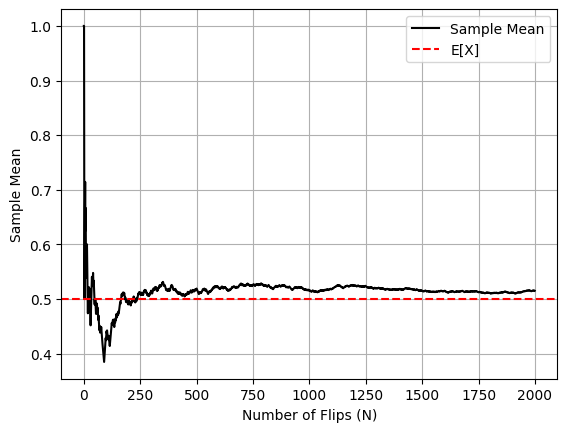

In [30]:
# Total number of flips
N = 2000

# Increasing number of flips (from 1 to N)
ns = np.arange(1, N+1, 1)

# Probability of heads
p = 0.5

# Outcomes of N coin flips (Bernoilli trials)
Y = ss.bernoulli.rvs(p = p, size = (N,))

# Estimated expected value (sample mean) for each of the n flips, for n = [1, N]
E_Y_n = Y.cumsum() / ns

#
plt.plot( E_Y_n , color = 'k', linestyle = '-', label = 'Sample Mean') 
plt.axhline(y = p, color = 'r', linestyle = '--', label = 'E[X]')
plt.grid(True)
plt.xlabel('Number of Flips (N)')
plt.ylabel('Sample Mean')
plt.legend() ;



**Condition Expectation (E[Y| X = x])** is the expectation of a RV `Y` , given knowledge/observation (`x`) of the outcome of another RV `X`. 

Let's assume that the fairness of our coin is affected by the roll of a die , where p = 0.5 if the roll is even and p = 0.75 if the roll is odd.

Let Y be the coin flip and X be the die roll. We want to know what is the expected value of the conditional expectation of the coin flip, given the die roll.

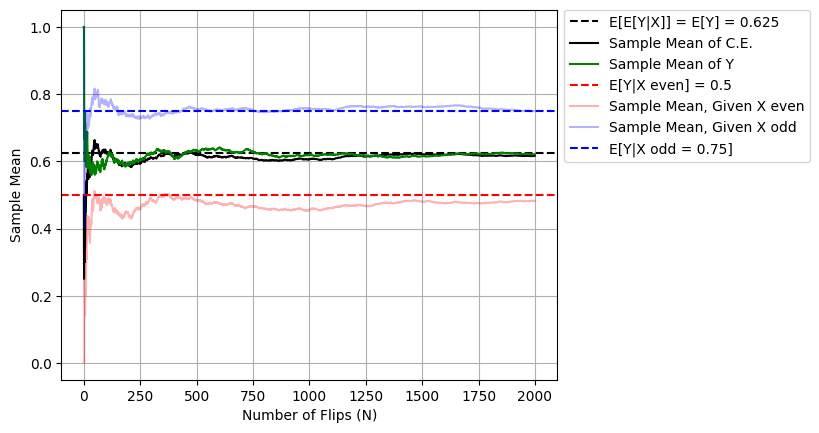

In [64]:
# probability of Heads as a function of whether the die roll (X) is even or odd
def p_coin(x, p_even, p_odd):
    return p_even if np.mod(x,2) == 0 else p_odd

# Outcomes of N die rolls (uniform distribution [a = 1, b = 6])
outcomes = np.arange(1, 7) # 1 to 6
probs = [1/6]*6
X = ss.rv_discrete(values = (outcomes, probs)).rvs(size = N)

p_given_roll_even = 0.5
p_given_roll_odd = 0.75

# The probability of heads as a function of whether the die roll was even or odd
ps = list(map(lambda x: p_coin(x, p_given_roll_even, p_given_roll_odd), X))

# Outcome of N coin clips based on the N die-based probabilies of heads
Y = ss.bernoulli.rvs(p = ps)

# Estimated expected value (sample mean) for each of the n flips, for n = [1, N]
E_Y_n = Y.cumsum() / ns

# Estimated conditional expectation, given roll is even
Y_x_even = ss.bernoulli.rvs(p = p_given_roll_even, size = (N,))
E_Y_x_even_n = Y_x_even.cumsum() / ns

# Estimated conditional expectation, given roll is odd
Y_x_odd = ss.bernoulli.rvs(p = p_given_roll_odd, size = (N,))
E_Y_x_odd_n = Y_x_odd.cumsum() / ns

# Theoretical expection of condtional expectation
E_E_Y_X = 0.5 * p_given_roll_even + 0.5*p_given_roll_odd

# Estimated expection of condtional expectation
E_E_Y_X_n = 0.5 * E_Y_x_even_n + 0.5 * E_Y_x_odd_n

plt.axhline(y = E_E_Y_X , color = 'k', linestyle = '--', label = f'E[E[Y|X]] = E[Y] = {E_E_Y_X}')
plt.plot( E_E_Y_X_n , color = 'k', linestyle = '-', label = "Sample Mean of C.E.") 
plt.plot( E_Y_n , color = 'g', linestyle = '-', label = 'Sample Mean of Y') 

plt.axhline(y = p_given_roll_even, color = 'r', linestyle = '--', label = f'E[Y|X even] = {p_given_roll_even}')
plt.plot( E_Y_x_even_n , color = 'r', linestyle = '-', alpha = 0.3, label = 'Sample Mean, Given X even') 

plt.plot( E_Y_x_odd_n , color = 'b', linestyle = '-', alpha = 0.3, label = 'Sample Mean, Given X odd') 
plt.axhline(y = p_given_roll_odd, color = 'b', linestyle = '--', label = f'E[Y|X odd = {p_given_roll_odd}]')

plt.grid(True)
plt.xlabel('Number of Flips (N)')
plt.ylabel('Sample Mean')
plt.legend(loc='upper left', bbox_to_anchor = (1, 1.02)) ;


This illustrates **Adam's Law** which states that the expectation of the conditional expectation of a RV is equal to the expectation of the RV. The black line is the sample mean of the conditional expectation of the coin flip given the die roll outcome, which we know to be 0.625 using the specified probabalites of heads for an even or odd roll. This sample mean is computed by averaging over the two individual conditional expectations of the coin flip when the roll is even (red) and odd (blue). Adam's Law implies that this quantity would result from simply taking the expecation of the coin flip directly, which we estimate by the sample mean of Y shown by the green line. We see that the green line approaches 0.625 as well, validating Adam's Law.